<a href="https://colab.research.google.com/github/ziyasarican/PythonMachineLearning/blob/main/clustering/K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

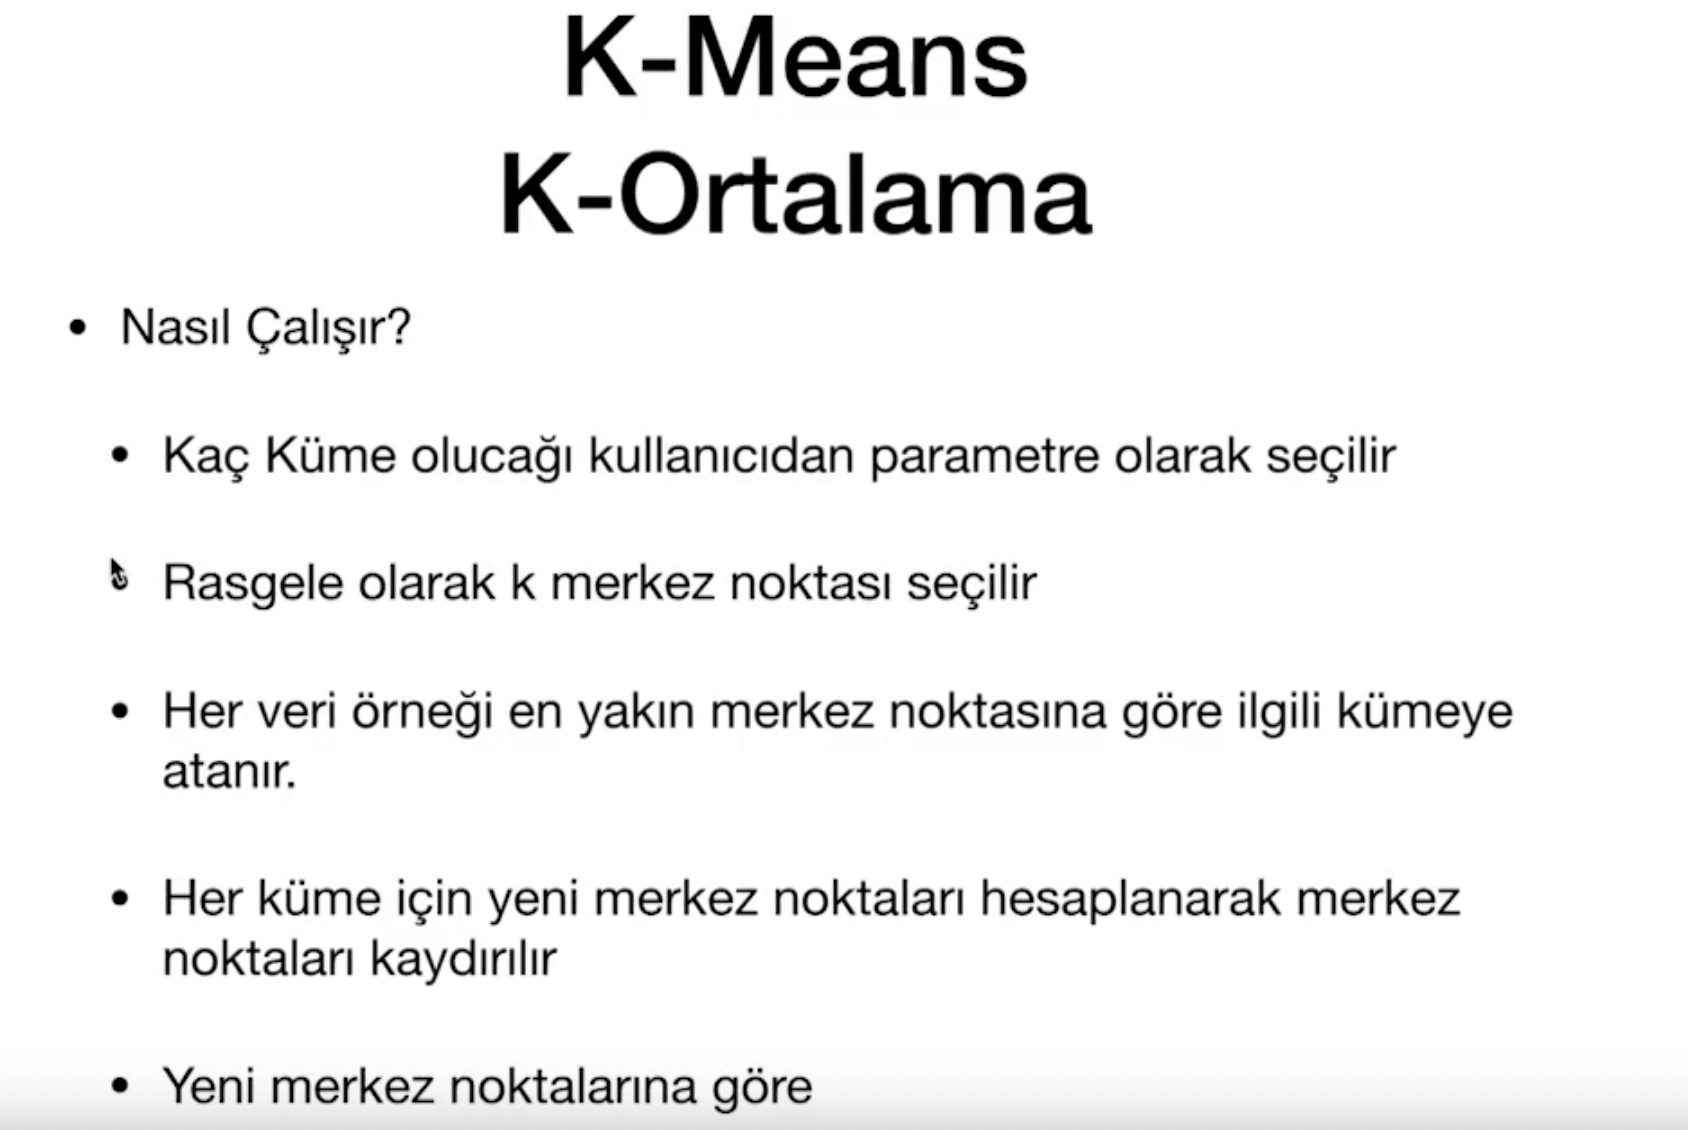

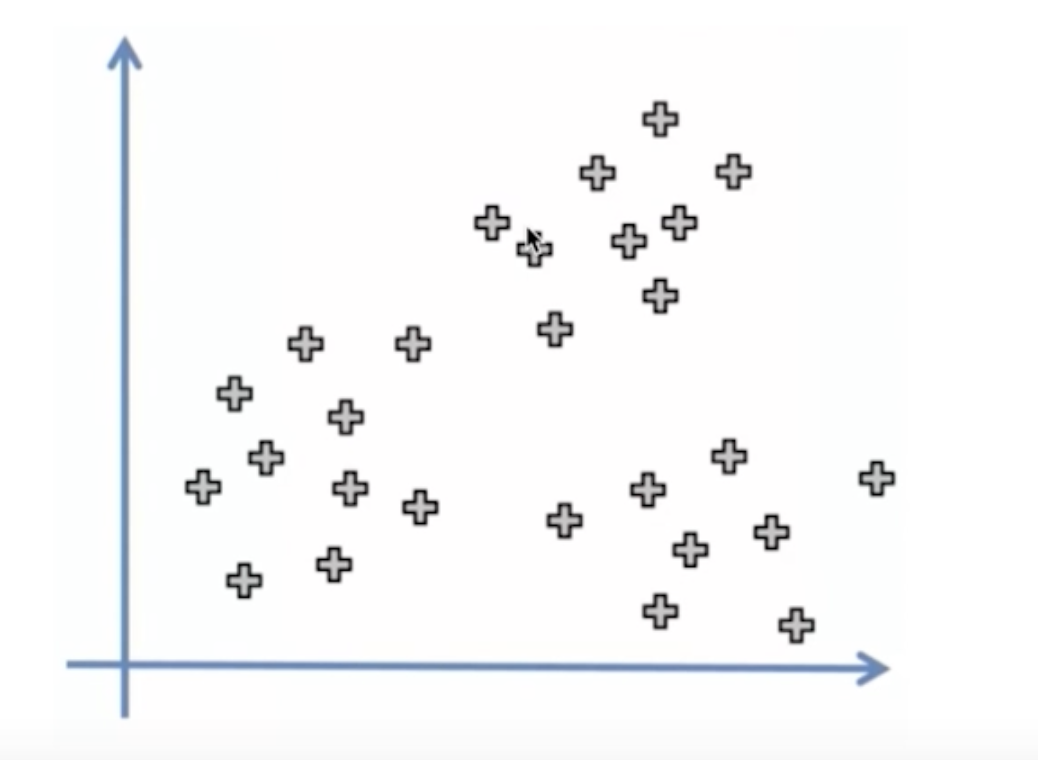

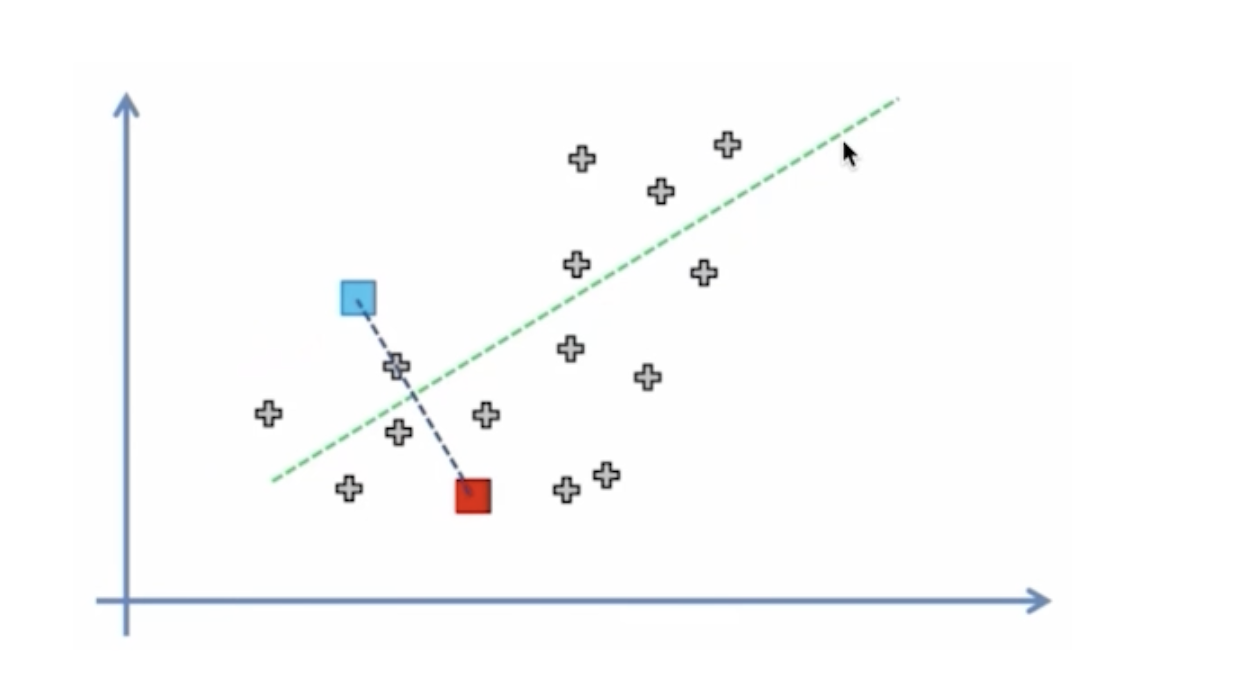

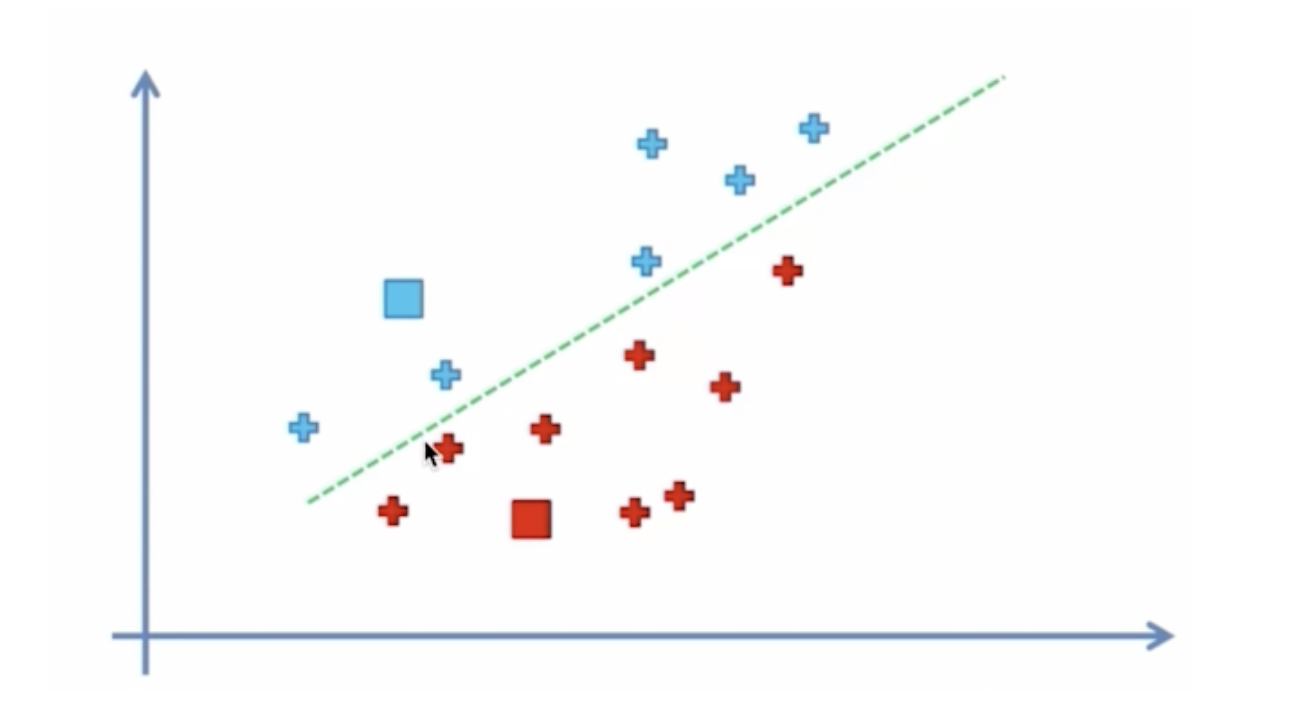

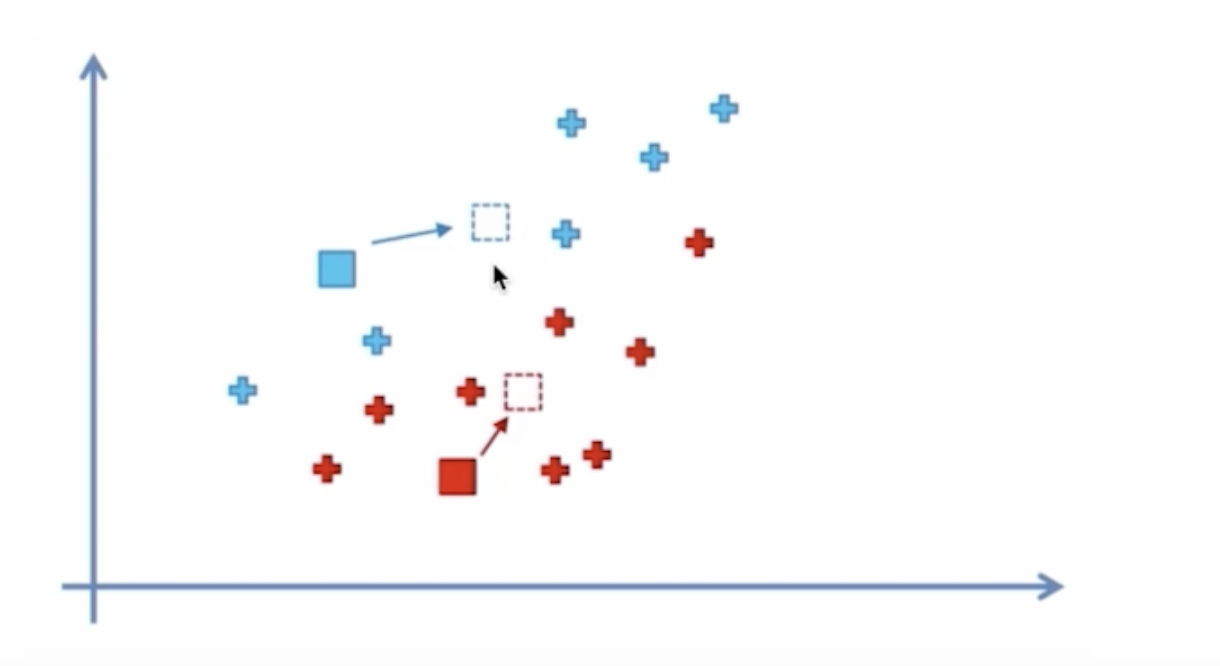

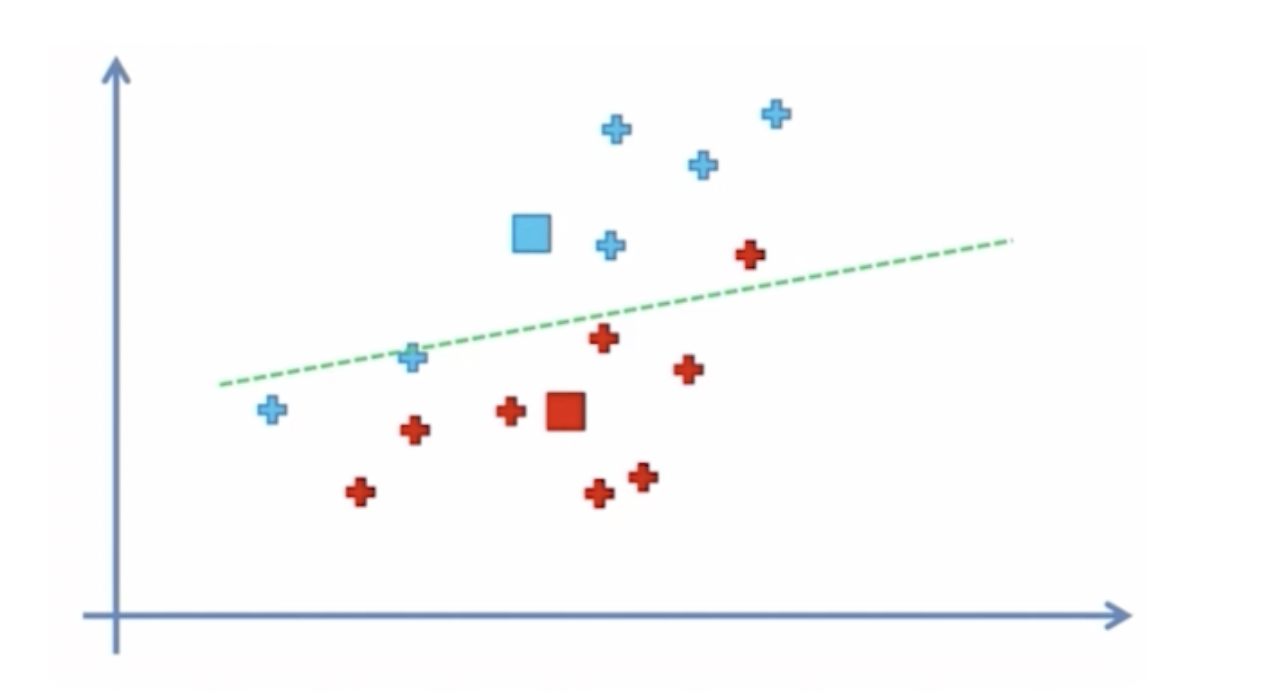

---
- Gözetimsizi öğrenme.
- Bu işlem kararlı hale gelene kadar devam ettirilir.
- Başlangıç noktaları rastgele seçildiği için yanlış kümelenmeye sebep olabilir.
- Bu başlangıç tuzağına düşmemek için K-Means++ var.
- Kaç kümeye ayrılacağı sorusu X-means veya WCSS(genelde bu değer grafiği çizdirilip dirsek noktası seçilir) ile çözülmeye çalışılır.
---

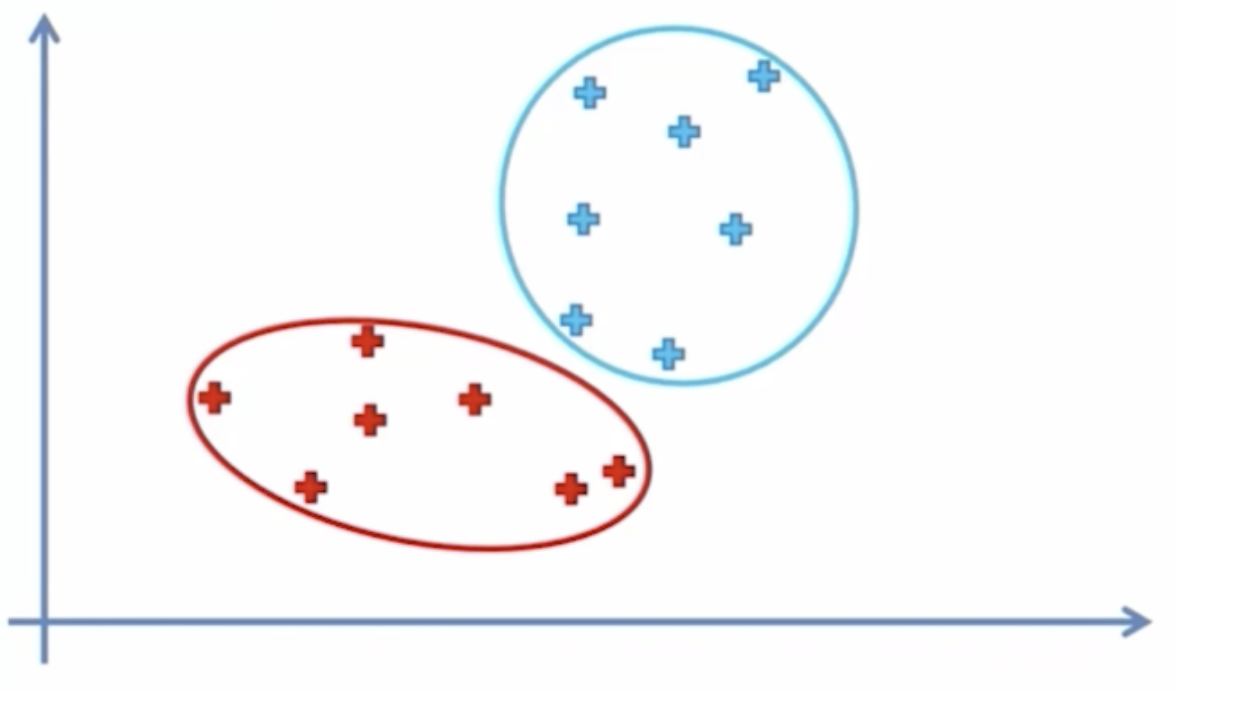

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("musteriler.csv")
df.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [31]:
df.isnull().sum()

No          0
Cinsiyet    0
Yas         0
Hacim       0
Maas        0
dtype: int64

In [42]:
x = df.loc[:,["Hacim","Maas"]].values

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++')

In [44]:
kmeans.fit(x)
# 3 başlangıç noktalarının koordinatları
kmeans.cluster_centers_

array([[ 58643.47826087,   5844.92753623],
       [104386.95652174,   7289.13043478],
       [ 22069.41176471,   5320.88235294]])

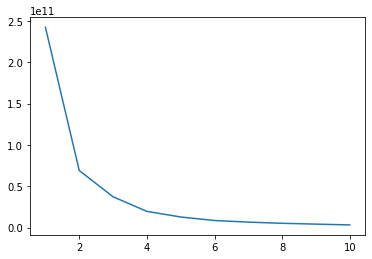

In [47]:
result = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
  kmeans.fit(x)
  # inertia_: wscc değerleri(başarısı için)
  result.append(kmeans.inertia_)

# küme sayısı olarak şekle göre 2-3-4 alınabilir
plt.plot(range(1,11),result)

In [49]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=10)
y_predict = kmeans.fit_predict(x)

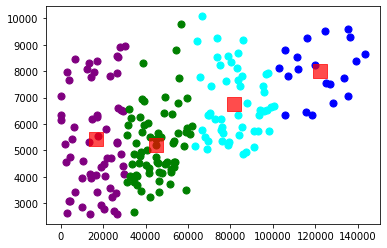

In [52]:
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=50, c='green',label='Cluster3')
plt.scatter(x[y_predict==3,0],x[y_predict==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7)

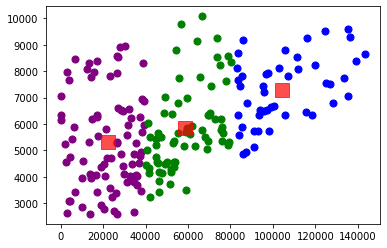

In [53]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=10)
y_predict = kmeans.fit_predict(x)
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=50, c='green',label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7)